# Assignment 04: Scikit-learn modeling pipeline for regression (Part 1)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

## Learning Objectives:

* Read data, train test split
* Scale the feature, reduce dimensions
* Hyperparameter tuning using grid search cross validation

# How to submit?
Write your answers in places where you see **YOUR ANSWER HERE** within the **#### ... ####** comments. If your answer is code, then use the Code cell, if its text, then use the Text cell. Save a copy of this notebook in your Google Drive by replacing the STUDENT with your SURNAME in CAPS. Then Download the notebook in your computer's hard drive by doing <code>File > Download > Download .ipynb </code>.

---

In [1]:
# Make project folder as current working directory
import os

print(os.getcwd())

C:\Users\syed_


In [5]:
os.chdir(r"C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\Assignment 4")
print(os.getcwd())

C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\Assignment 4


---

# Data Description

The dataset provided for this lab (<code>data.csv</code>) contains Leaf Chlorophyll Concentration (LCC) of Sorghum (*Sorghum bicolor*) and corresponding hyperspectral reflectance signature data collected in 2016 from Marciopa, AZ. There are total 393 sample data in the csv file. Look at Figure 1a, where you can see how Sorghum plants were planted in the field as row plots. Two of the rows were considered as one plot. Total 393 plots like this were sampled for this study. During the data collection date, 3-4 representative well-lit leaves were considered from each plot and two measurements were taken for the same leaf. After collecting 3-4 measurements per sample, the values were averaged to get one representative LCC and reflectance data for each plot.

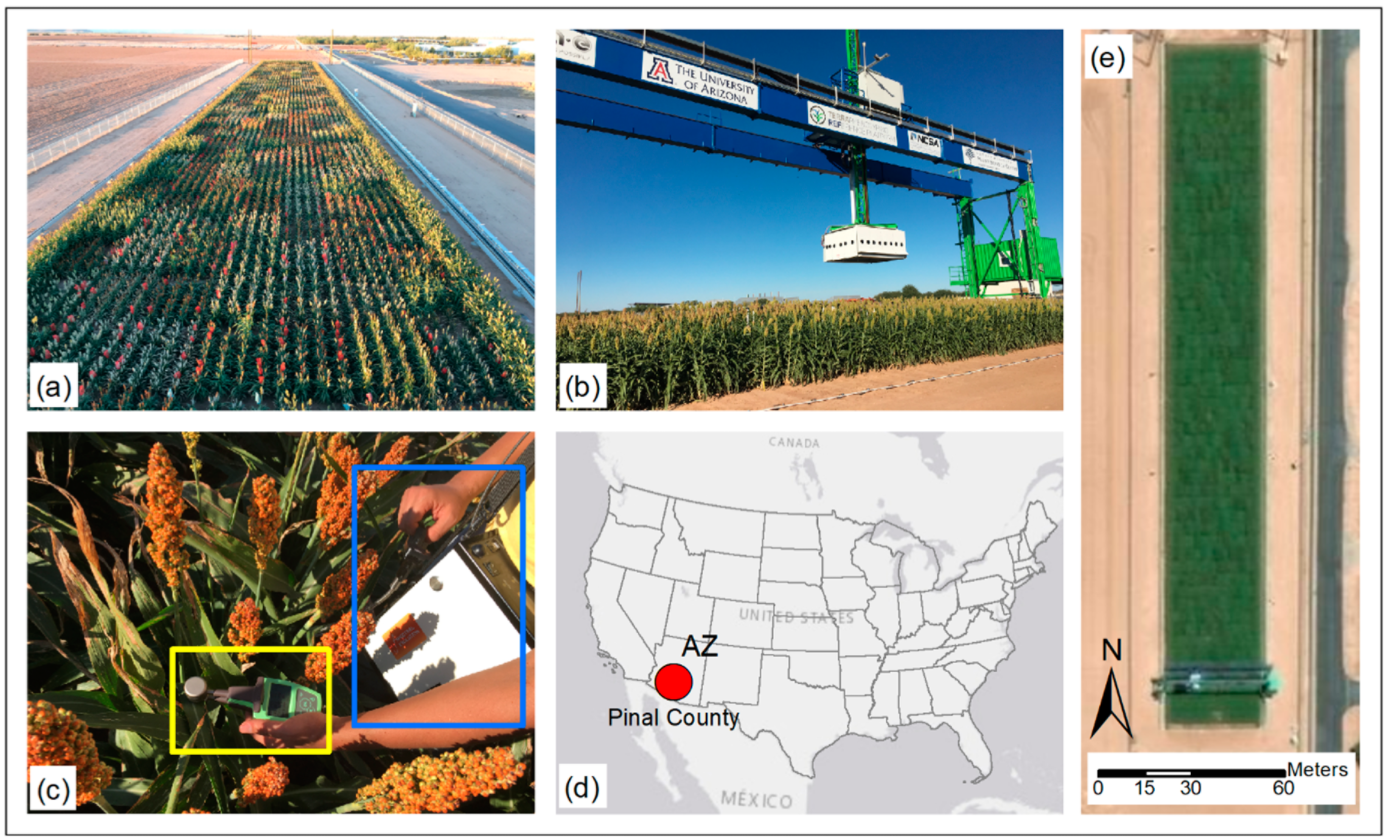

The LCC measurement was conducted using DUALEX-4 Scientific (Figure 1c in Yellow Box) and the hyperspectral reflectance data was collected using a Spectral Evolution PSR-3500 Handheld Spectraradiometer (Figure 1c in Blue Box). The DUALEX device gives three different chemical properties of leaves (leaf chlorophyll, leaf nitrogen, and flavonol index), from which we are interested in only the LCC. The hyperspectral instrument on the other hand provide reflectance at wavelgnths ranged from 350 to 2500 nm. Although the spectral resolution is not exactly 1 nm, later after the data collection, the wavelength values were interpolated at 1 nm interval.

The goal of this lab is to **estimate leaf chlorophyll concentration of Sorghum from hyperspectral reflectance data using machine learning regression algorithms**.

Please refer to [Bhadra, Sagan et al. (2020)](https://www.mdpi.com/2072-4292/12/13/2082) for more information about the data and research questions. We will be using the dataset used in this article for this lab.

# Exploratory Statistics from the Data

In machine learning, whenever you get a dataset, the first thing you want to do is conduct some exploratory or descriptive statistics of the data. That means, you may have some independent variables (in our case its 2150 since we have one wavelegnth information from 350 - 2500 nm) and maybe one dependent variable (in this lab it is the LCC value). The dependent variable can be either continuous or discrete. If it is continuous, then we have a regression problem, whereas if the dependent variable is discrete, then we have to do a classification problem. However, we should look at mean, median, mode, standard deviation, interquartile range and some plots (e.g., histograms, probaility distributions, etc.) before we dive into modeling.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Read the data
data = pd.read_csv('.\data.csv')
data

Plot   LCC        350        351        352        353        354  \
0    P1R10  53.9  30.305487  27.143000  28.664244  26.851175  20.036507   
1    P1R11  51.3  12.094013  15.584000  15.134626  14.188744  12.498077   
2    P1R12  50.7  20.779255  22.077999  17.569893  16.380444  20.169111   
3    P1R13  35.0  13.452132  15.464000  18.432114  20.312998  20.562998   
4    P1R13  39.8  12.678878  13.402000  13.669499  13.017746  10.987080   
..     ...   ...        ...        ...        ...        ...        ...   
388  P7R52  58.9  12.682861   9.231000   7.084758   5.917798   6.219798   
389   P7R6  49.7  10.347120   9.259000   9.920248  12.370569  17.504568   
390   P7R7  44.8   7.777624   7.407000   6.745752   8.259638  13.036304   
391   P7R8  38.9  38.256588  28.570999  36.242222  35.974674  23.798674   
392   P7R9  56.8  38.816490  35.714001  32.759010  34.765942  44.215942   

           355        356        357  ...       2491       2492       2493  \
0    28.427467  31.855030  19.757969  ...   2.536827   2.669911   2.881734   
1    13.429801  13.658266  11.565734  ...   6.314881   2.795955   2.831865   
2    17.828903  16.283236  18.180765  ...   2.691698   2.795955   2.831865   
3    18.968018  18.775972  22.336027  ...  12.798337  10.838967  12.004902   
4    14.093153  16.135077  14.361924  ...  11.624504  14.569221  18.065662   
..         ...        ...        ...  ...        ...        ...        ...   
388  15.644213  21.772779  17.845221  ...  19.488489  17.727222  13.181667   
389  14.353913  11.300193  10.620808  ...  12.500000  21.780434  40.341301   
390   9.397106   7.181787  10.471212  ...  21.195732  22.348351  17.045052   
391  24.395042  29.132540  40.221458  ...   2.536827   5.424973  11.146918   
392  45.160999  44.556141  42.539860  ...  26.201054  29.974436  28.385311   

          2494       2495       2496       2497       2498       2499  \
0     3.056732   3.145825   3.429180   5.459000   7.488819   6.698404   
1     3.060356   3.738098   4.402958   4.952000   5.501042   9.127055   
2     3.060356   3.738098   4.655682   7.729500  10.803318  16.305597   
3    14.219804  18.881725  22.368326  15.288500   8.208674  17.698574   
4    18.764359  12.936502   7.455791   5.096000   2.736209  16.955208   
..         ...        ...        ...        ...        ...        ...   
388  11.161897  15.034255  18.013460  12.962999   7.912539   6.081660   
389  52.025986  47.669979  41.911232  23.541500   5.171768   3.172650   
390  11.940742   7.300640   3.741092   9.896000  16.050907  26.692543   
391  16.165234  19.542126  21.728653  13.213500   4.698349   4.425632   
392  23.993258  13.062560   3.254207   3.536000   3.817793  10.884619   

          2500  
0     5.594289  
1    13.095325  
2    22.077999  
3    29.031551  
4    33.018288  
..         ...  
388   4.608900  
389   2.994464  
390  37.833244  
391   5.069737  
392  18.706156  

[393 rows x 2153 columns]

Here, we have 2153 columns, among which the column 'Plot' represents unique plot id that was given for each plot in the field. The 'LCC' column is the LCC value measured in the field using the DUALEX device, and the rest of the columns from 350 to 2500 represent the corresponding hyperspectral reflectance data.

#### Accessing data from each column
If you want to get one column of data as an array (or vector), we can do that by doing these:

In [9]:
## Let's get all the reflectance values from 355 nm

# Way 1
ref_355 = data['355']

In [10]:
# Let's see what is in there
ref_355

0      28.427467
1      13.429801
2      17.828903
3      18.968018
4      14.093153
         ...    
388    15.644213
389    14.353913
390     9.397106
391    24.395042
392    45.160999
Name: 355, Length: 393, dtype: float64

In [11]:
# Also see what is the datatype of the returned variable
type(ref_355)

pandas.core.series.Series

**Q 01.** You got a <code>pandas.core.series.Series</code> object. What is a pandas series? What is the difference between a pandas series and a numpy array?

\#### YOUR ANSWER HERE ####

A Pandas Series is a one-dimensional labeled data structure in the Pandas library, primarily built on top of NumPy arrays. It is one of the fundamental data structures in Pandas and is designed to hold and manipulate data with labels or indexes. Some key characteristics and differences between Pandas Series and a Numpy array are as follows: 

Labeling: The most significant difference is that a Pandas Series has labels or indexes associated with each element, allowing you to access data using these labels. In contrast, NumPy arrays are based on integer-based indexing.

Data Types: While in NumPy arrays all elements are of the same data type, Pandas Series can hold data of different data types. This flexibility is particularly useful when dealing with heterogeneous data.

Indexing: You can use labels or integer-based indexing to access elements in a Pandas Series. NumPy arrays use only integer-based indexing.

Missing Data: Pandas Series can handle missing data efficiently using NaN (Not a Number) values, which are not available in NumPy arrays.

In [12]:
# Way 2
ref_355 = data.iloc[:, 7] # For this case, you need to know the column index position
ref_355

0      28.427467
1      13.429801
2      17.828903
3      18.968018
4      14.093153
         ...    
388    15.644213
389    14.353913
390     9.397106
391    24.395042
392    45.160999
Name: 355, Length: 393, dtype: float64

In [13]:
# Way 3
ref_355 = data.loc[:, '355'] # Similar to .iloc, but .loc takes the name of the column instead of index
ref_355

0      28.427467
1      13.429801
2      17.828903
3      18.968018
4      14.093153
         ...    
388    15.644213
389    14.353913
390     9.397106
391    24.395042
392    45.160999
Name: 355, Length: 393, dtype: float64

In [14]:
# You can convert the pandas series to a np array
ref_355 = ref_355.values
print(type(ref_355))

<class 'numpy.ndarray'>


**Q 02.** Get the values of LCC in a variable named <code>lcc</code> as a **np array** and print the mean, median, standard deviation of <code>lcc</code>.

In [23]:
### YOUR CODE HERE ###

lcc = data['LCC']
lcc = lcc.values
type(lcc)

# Calculate mean, median and standard deviation
mean_value = np.mean(lcc)
median_value = np.median(lcc)
std_dev_value = np.std(lcc)

print(f"Mean of LCC: {mean_value}")
print(f"Median of LCC: {median_value}")
print(f"Standard Deviation of LCC: {std_dev_value}")


######################

Mean of LCC: 49.72926208651399
Median of LCC: 50.1
Standard Deviation of LCC: 7.55259311854295


**Q 03.** Create a histogram of <code>lcc</code> values using <code>plt.hist</code> from <code>matplotlib</code>. *Remember,* the figure must have x and y labels, title and good resolution (150-300 dpi). The histogram would look something like this:

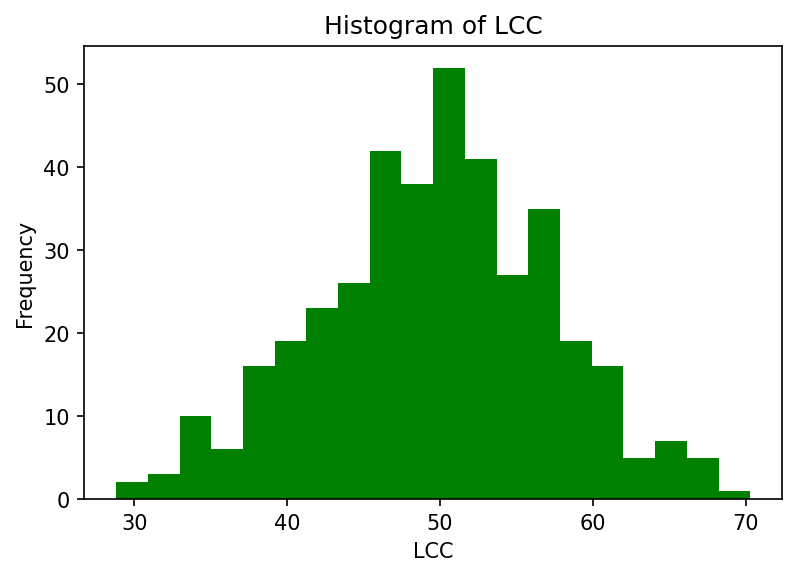

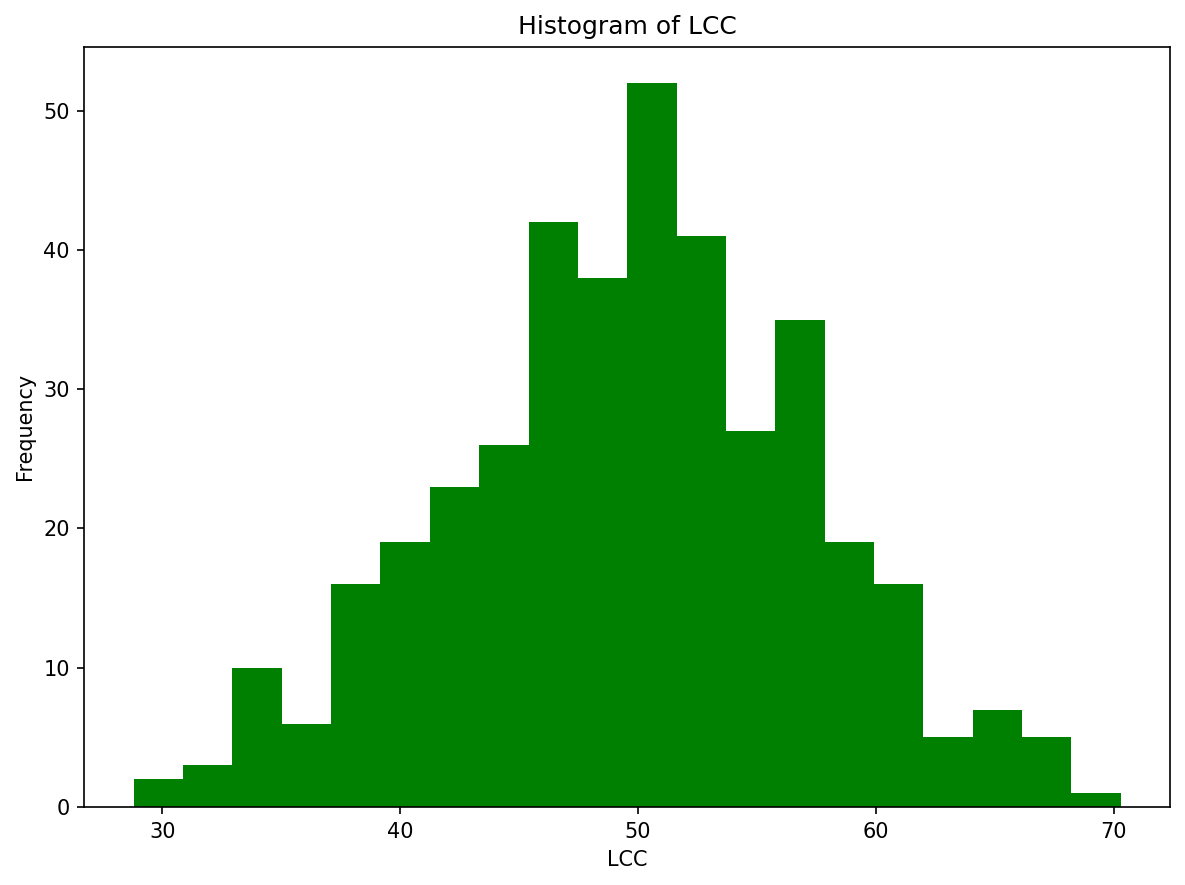

In [33]:
### YOUR CODE HERE ###

# Create the histogram
plt.figure(figsize=(8, 6), dpi=150)  # Setting the resolution using dpi and figure size
plt.hist(lcc, bins = 20, color = 'green')  

# Add labels and title
plt.xlabel('LCC')
plt.ylabel('Frequency')
plt.title('Histogram of LCC')

# Display the histogram
plt.tight_layout()  # Adjusts the layout for better appearance
plt.show()


######################

#### Using exploratory statistics tools directly from pandas

Instead of accessing each column seperately and getting the descriptive statistics in a for loop, we can directly utilize pandas functions to get overall exploratory statistics of all columns.

In [34]:
# To do this we can use df.describe method
descriptive_stat = data.describe()
descriptive_stat

LCC         350         351         352         353         354  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean    49.729262   18.537103   18.115799   17.918215   17.978751   18.426474   
std      7.562220    7.977884    8.658959    7.672780    7.711913    8.529685   
min     28.800000    3.972618    1.316000    3.292875    2.875440    3.649782   
25%     45.000000   13.055349   12.857000   12.935261   13.112441   12.936153   
50%     50.100000   17.782482   17.073000   16.903891   17.028481   16.804119   
75%     55.000000   21.740116   21.951000   21.266361   21.498960   22.737045   
max     70.300000   59.021408   67.647003   55.890797   49.147129   56.802532   

              355         356         357         358  ...        2491  \
count  393.000000  393.000000  393.000000  393.000000  ...  393.000000   
mean    18.532013   18.648041   18.877272   18.893827  ...   10.312666   
std      7.648281    7.802609    8.252180    7.678161  ...    9.670525   
min      3.514715    2.260043    3.567214    4.050401  ...    1.811783   
25%     13.441566   13.658266   13.639299   14.001621  ...    3.209295   
50%     17.430378   17.609234   17.730196   17.925108  ...    6.550068   
75%     22.681442   22.976009   22.336027   22.552647  ...   13.900471   
max     52.058167   52.719650   53.315636   52.157036  ...   77.980759   

             2492        2493        2494        2495        2496        2497  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean    10.629297   12.238176   13.648374   14.595089   15.322248   14.075537   
std      9.394241    9.213435   10.553756   10.535694   12.873484   11.121627   
min      1.912682    1.753858    1.756431    2.015286    2.059107    2.240000   
25%      3.545573    4.396247    5.009492    6.068694    3.742261    4.952000   
50%      7.576018   10.815364   11.296013   12.633830   12.700974   10.923500   
75%     14.369427   16.888596   18.693819   20.195459   22.368326   19.524000   
max     74.196175   49.701454   58.416115   61.441452   75.206017   59.420502   

             2498        2499        2500  
count  393.000000  393.000000  393.000000  
mean    12.828826   14.471442   16.435442  
std     12.868734   11.014224   14.549113  
min      2.420893    2.583038    2.675313  
25%      3.762961    4.999493    4.870293  
50%      6.490057   12.259693   12.143404  
75%     18.813850   19.976299   23.350103  
max     76.019714   55.742451   83.301949  

[8 rows x 2152 columns]

You can see that the <code>.describe()</code> method automatically omitted the 'Plot' column because it is a column with texts which does not have any numerival staitistics. The <code>.describe()</code> can calcualte several common statistics very fast and return a dataframe out of it.

Let's get all the mean values of wavelenghts ranging from 350 to 2500 nm. To do that, we alerady know the index position of <code>mean</code> and the index position of 350-2500. Do it like this:

In [39]:
reflectance_mean = descriptive_stat.iloc[1, 1:]
reflectance_mean

350     18.537103
351     18.115799
352     17.918215
353     17.978751
354     18.426474
          ...    
2496    15.322248
2497    14.075537
2498    12.828826
2499    14.471442
2500    16.435442
Name: mean, Length: 2151, dtype: float64

**Important:** Understand the iloc index position. Ask yourself why the first index was 1 and why the 2nd index was 1:? If you don't understand, play with some other value and build the intuition.

We can plot the mean reflectance over the wavelenghts. The wavelegnth values in the given series can be found from the .index properties of the pd.series.

In [36]:
reflectance_mean.index

Index(['350', '351', '352', '353', '354', '355', '356', '357', '358', '359',
       ...
       '2491', '2492', '2493', '2494', '2495', '2496', '2497', '2498', '2499',
       '2500'],
      dtype='object', length=2151)

Note that the values are string here, not numerical values, which can be problematic. So we have to remember that when we are working with this.

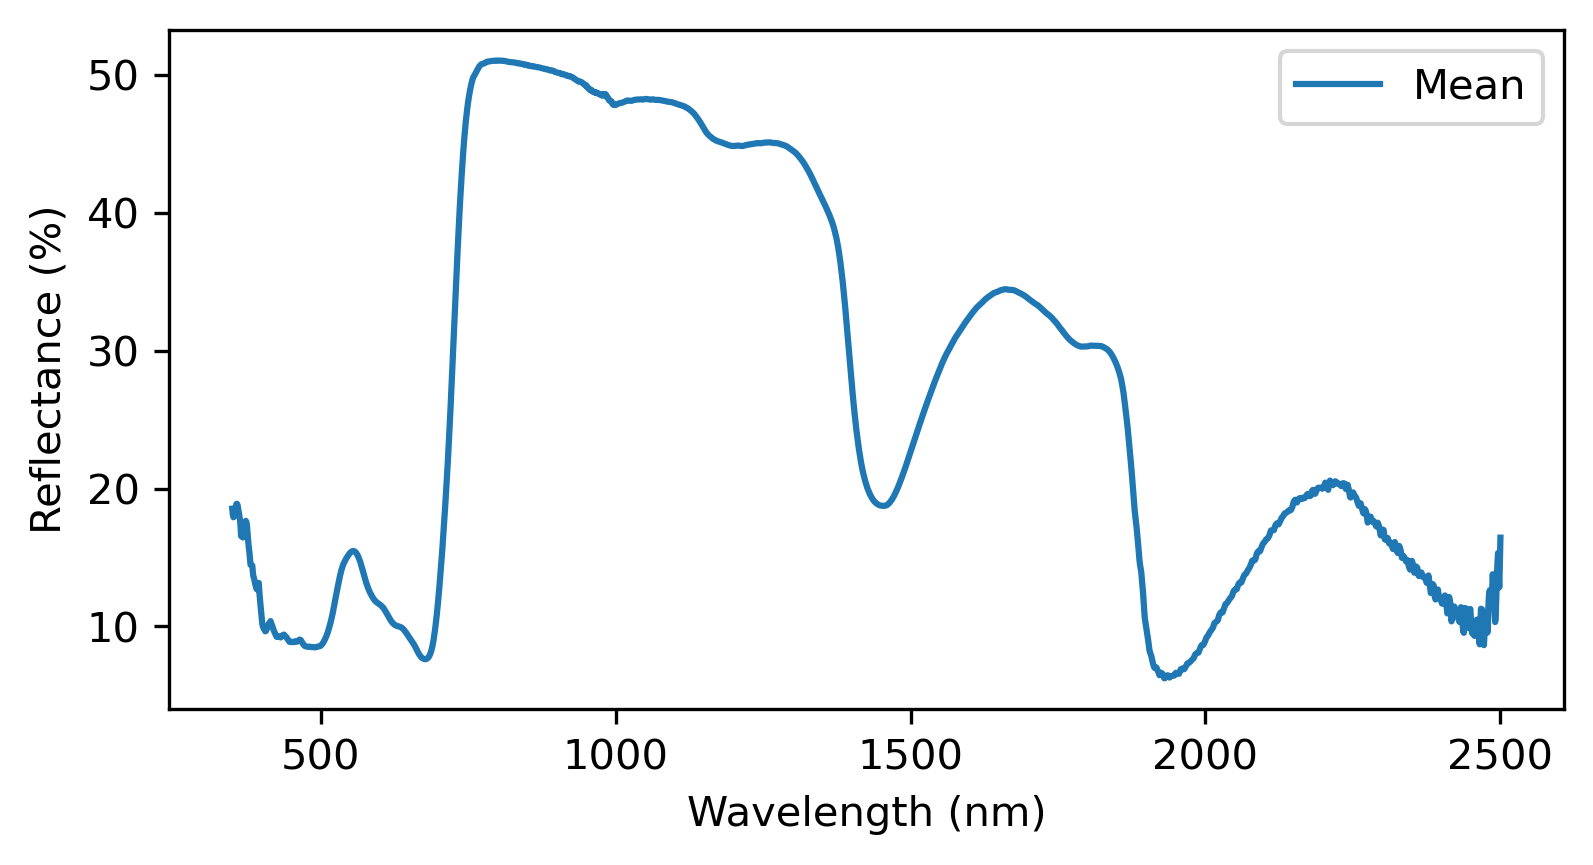

In [40]:
# Plotting mean reflectance curve of the dataset
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)

ax.plot(reflectance_mean.index.astype('int'), reflectance_mean.values, label='Mean')
#       <---converting the str to int here--> <------values only------>

ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance (%)')

plt.show()

This is the most famous typical vegetation spectra we often see in Remote Sensing texbooks. We have lower reflectance values in the blue region (around 400-450 nm), little bump at the green rgion (close to 550 nm), then another valley in the red region, then the high reflectance in the NIR region, followed by some valleys in the SWIR region.

**Q 04.** Create a figure of the mean, 25th percentile, 50th percentile, and 75th percentile reflectance lines from the given dataset. Here's what to do:
1. Get the percentile reflectances from the <code>descriptive_state</code> dataframe as seperate variables.
2. You can plot multiple lines in the same plot. Just use different labels for each plot. [Look here if you need help](https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php)
3. Remember to show the legend.

Your result should look similar like this:
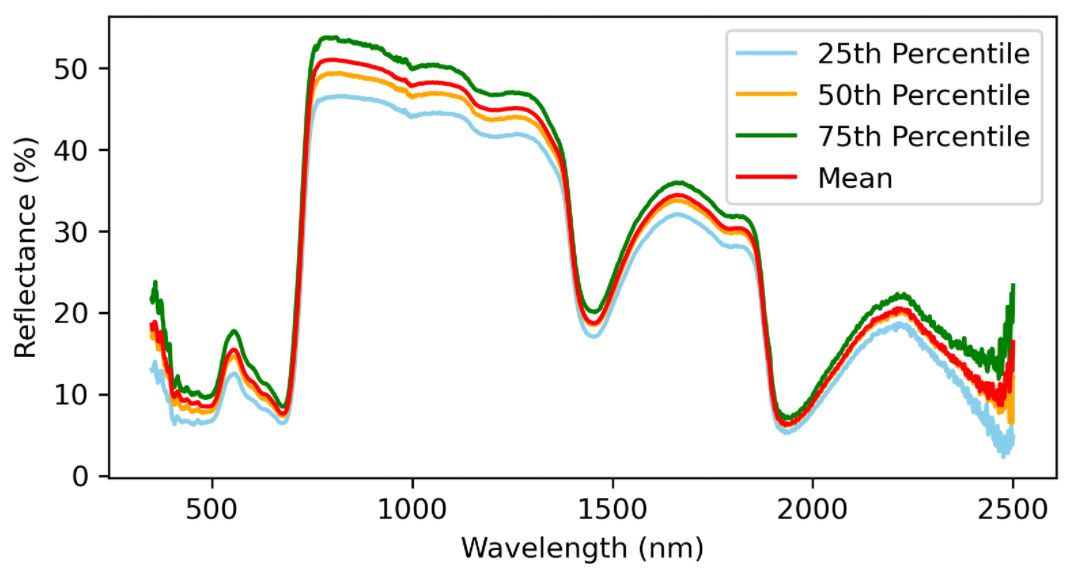

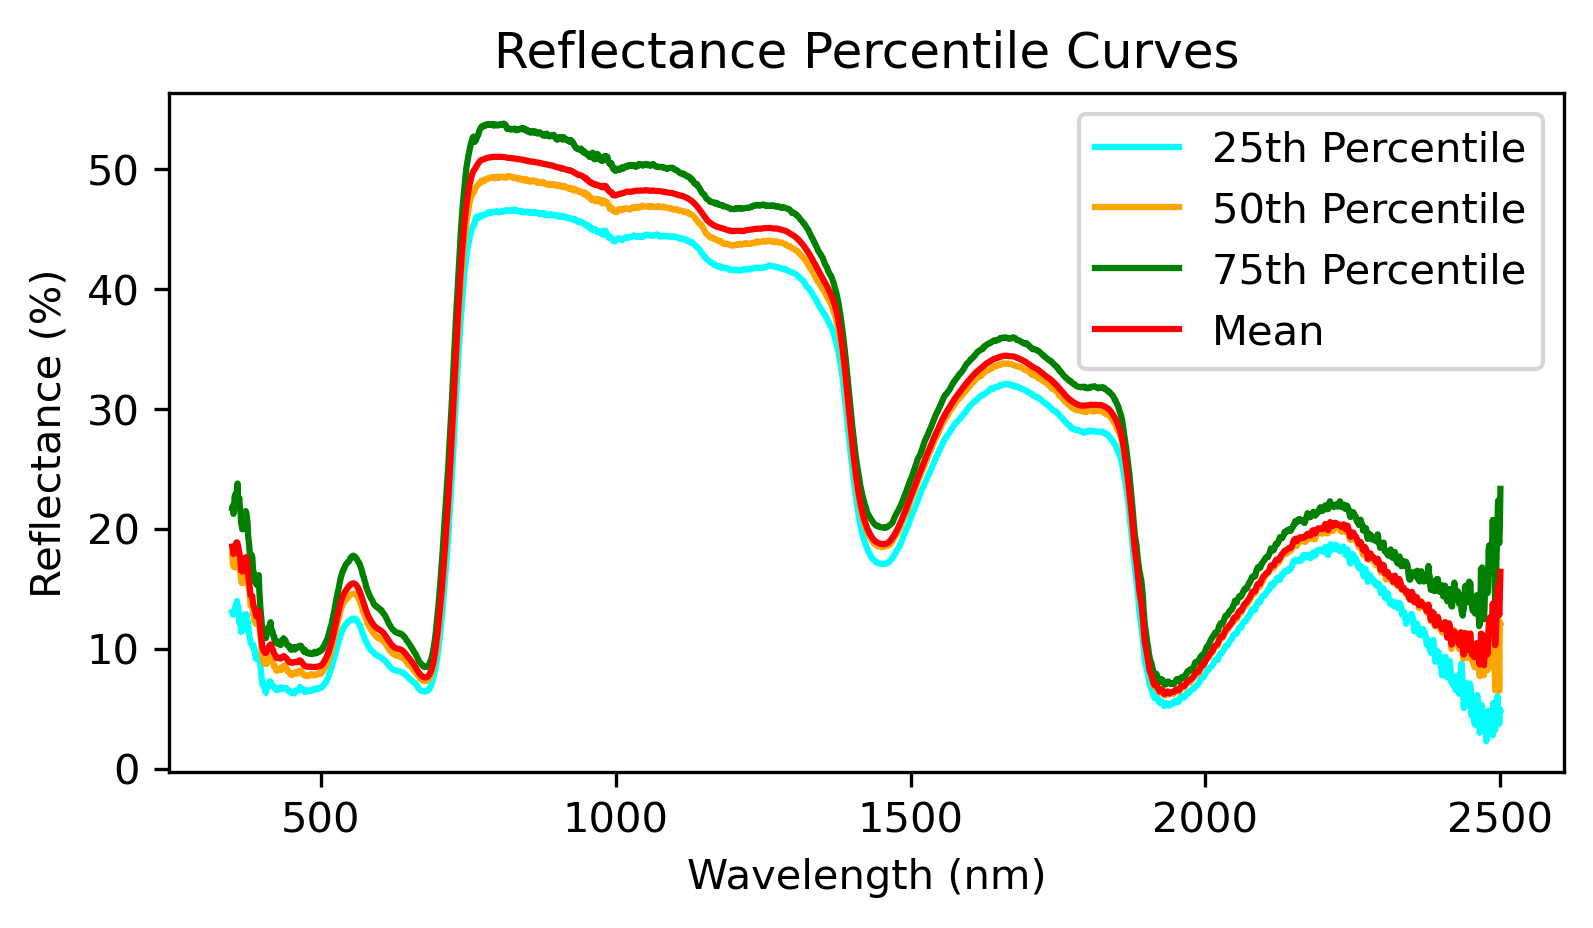

In [45]:
### YOUR CODE HERE ###

# Extracting the required percentiles from the descriptive_stat dataframe
reflectance_mean = descriptive_stat.iloc[1, 1:]
reflentance_25th = descriptive_stat.iloc[descriptive_stat.index.get_loc('25%'), 1:]
reflectance_50th = descriptive_stat.iloc[descriptive_stat.index.get_loc('50%'), 1:]
reflectance_75th = descriptive_stat.iloc[descriptive_stat.index.get_loc('75%'), 1:]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)

# Plotting each line
ax.plot(reflectance_25th.index.astype('int'), reflectance_25th.values, label='25th Percentile', color='cyan')
ax.plot(reflectance_50th.index.astype('int'), reflectance_50th.values, label='50th Percentile', color='orange')
ax.plot(reflectance_75th.index.astype('int'), reflectance_75th.values, label='75th Percentile', color='green')
ax.plot(reflectance_mean.index.astype('int'), reflectance_mean.values, label='Mean', color='red')

# Setting labels, title, and legend
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance (%)')
ax.legend()
ax.set_title('Reflectance Percentile Curves')

plt.show()



######################

From the above reflectance curve, it seems like that the data is very noisy on the two ends. Before the wavelength is around 450 nm and after the wavlength of 2000 nm, the data is noisy and we can remove that.

**Q 05.** Create a dataframe named <code>X</code> where only the wavelength from 451 nm to 2000 nm reflectance values are available. In other words, remove the columns which contains wavelength data from 350 - 450 nm and 2001 - 2500 nm. You can use any method you want (for example, iloc or loc or any other). The resulting data should look something like this:

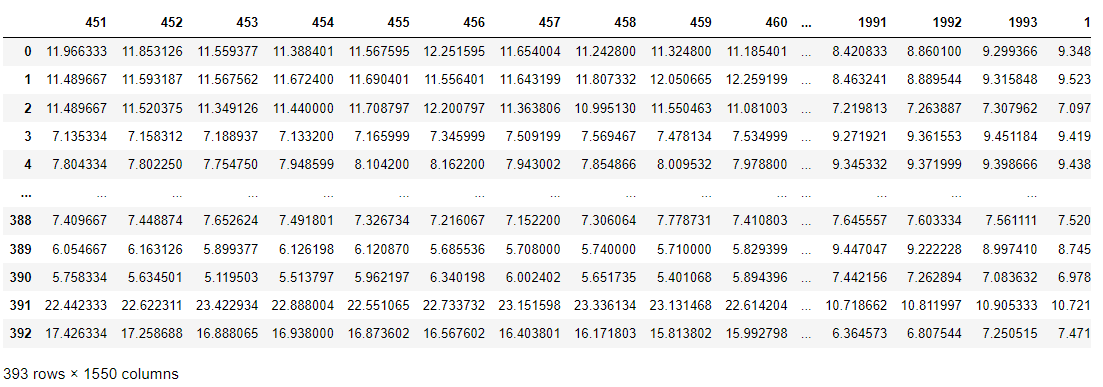

**Important:** The dataframe must have **393 rows** and **1550 columns**

In [58]:
### YOUR CODE HERE ###

X = data.loc[:, '451':'2000']
X

######################

451        452        453        454        455        456  \
0    11.966333  11.853126  11.559377  11.388401  11.567595  12.251595   
1    11.489667  11.593187  11.567562  11.672400  11.690401  11.556401   
2    11.489667  11.520375  11.349126  11.440000  11.708797  12.200797   
3     7.135334   7.158312   7.188937   7.133200   7.165999   7.345999   
4     7.804334   7.802250   7.754750   7.948599   8.104200   8.162200   
..         ...        ...        ...        ...        ...        ...   
388   7.409667   7.448874   7.652624   7.491801   7.326734   7.216067   
389   6.054667   6.163126   5.899377   6.126198   6.120870   5.685536   
390   5.758334   5.634501   5.119503   5.513797   5.962197   6.340198   
391  22.442333  22.622311  23.422934  22.888004  22.551065  22.733732   
392  17.426334  17.258688  16.888065  16.938000  16.873602  16.567602   

           457        458        459        460  ...       1991       1992  \
0    11.654004  11.242800  11.324800  11.185401  ...   8.420833   8.860100   
1    11.643199  11.807332  12.050665  12.259199  ...   8.463241   8.889544   
2    11.363806  10.995130  11.550463  11.081003  ...   7.219813   7.263887   
3     7.509199   7.569467   7.478134   7.534999  ...   9.271921   9.361553   
4     7.943002   7.854866   8.009532   7.978800  ...   9.345332   9.371999   
..         ...        ...        ...        ...  ...        ...        ...   
388   7.152200   7.306064   7.778731   7.410803  ...   7.645557   7.603334   
389   5.708000   5.740000   5.710000   5.829399  ...   9.447047   9.222228   
390   6.002402   5.651735   5.401068   5.894396  ...   7.442156   7.262894   
391  23.151598  23.336134  23.131468  22.614204  ...  10.718662  10.811997   
392  16.403801  16.171803  15.813802  15.992798  ...   6.364573   6.807544   

          1993       1994       1995      1996      1997       1998    1999  \
0     9.299366   9.348825   9.008473  8.668122  8.558742   8.548370   8.538   
1     9.315848   9.523643   9.512929  9.502214  9.458817   9.401408   9.344   
2     7.307962   7.097325   6.631977  6.166627  5.959077   5.862039   5.765   
3     9.451184   9.419573   9.266718  9.113864  9.108961   9.167480   9.226   
4     9.398666   9.438964   9.492891  9.546819  9.838578  10.232289  10.626   
..         ...        ...        ...       ...       ...        ...     ...   
388   7.561111   7.520715   7.482144  7.443573  7.657544   7.979772   8.302   
389   8.997410   8.745359   8.466079  8.186798  8.094186   8.081593   8.069   
390   7.083632   6.978286   6.946858  6.915430  7.042882   7.238441   7.434   
391  10.905333  10.721468  10.260405  9.799341  9.776883   9.942441  10.108   
392   7.250515   7.471643   7.470929  7.470214  7.288787   7.029893   6.771   

          2000  
0     8.756152  
1     9.469928  
2     5.898706  
3     9.755639  
4    11.031563  
..         ...  
388   8.444595  
389   8.155668  
390   7.288072  
391  10.253188  
392   7.098413  

[393 rows x 1550 columns]

**Q 06.** Create a Figure with necessary elements and show the mean, 25th, 50th, and 75th percentile values from the newly created <code>X</code>. The figure should look something like this:
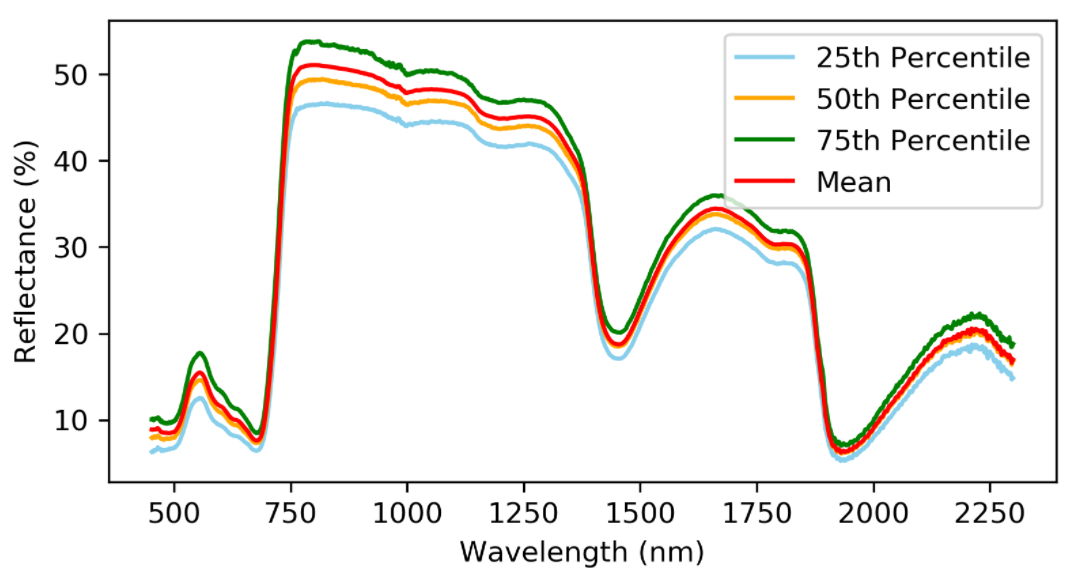

In [61]:
# To do this we can use df.describe method
Xdescriptive_stat = X.describe()
Xdescriptive_stat

451         452         453         454         455         456  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean     8.873343    8.875303    8.860200    8.857190    8.871201    8.908726   
std      4.352008    4.331623    4.318690    4.285270    4.265679    4.261199   
min      2.442000    2.431312    2.499375    2.462801    2.383600    2.212668   
25%      6.336667    6.307499    6.348184    6.287999    6.281735    6.461599   
50%      7.912333    7.937251    7.869747    7.917399    7.984668    8.031535   
75%      9.973333   10.053500   10.048002   10.149198   10.125600    9.939803   
max     34.305000   34.023247   34.425747   34.038803   33.806534   33.937866   

              457         458         459         460  ...        1991  \
count  393.000000  393.000000  393.000000  393.000000  ...  393.000000   
mean     8.921663    8.917281    8.891016    8.892412  ...    8.437591   
std      4.217163    4.185206    4.169567    4.143080  ...    1.644042   
min      2.318399    2.445066    2.547733    2.555600  ...    4.435446   
25%      6.510401    6.491601    6.445467    6.487998  ...    7.462998   
50%      8.027798    8.081137    7.958467    7.935801  ...    8.256707   
75%      9.992400   10.069336   10.146933   10.116999  ...    9.314127   
max     34.385998   34.387470   33.666138   33.398403  ...   16.985334   

             1992        1993        1994        1995        1996        1997  \
count  393.000000  393.000000  393.000000  393.000000  393.000000  393.000000   
mean     8.523074    8.608556    8.649583    8.646153    8.642724    8.706577   
std      1.627028    1.642901    1.645972    1.632080    1.645375    1.638693   
min      4.397667    4.359889    4.504211    4.811511    4.396518    4.488211   
25%      7.523670    7.561111    7.635929    7.624578    7.589985    7.682736   
50%      8.401892    8.434664    8.476143    8.519048    8.548858    8.645617   
75%      9.350681    9.417666    9.482179    9.510530    9.538781    9.605247   
max     16.972000   16.958666   17.059498   17.274494   17.489491   17.319901   

             1998        1999        2000  
count  393.000000  393.000000  393.000000  
mean     8.799273    8.891969    9.008424  
std      1.637524    1.661694    1.637763  
min      4.797105    5.062000    5.148592  
25%      7.771998    7.817000    7.931892  
50%      8.730224    8.833000    8.975627  
75%      9.659701    9.675000    9.869636  
max     16.985451   16.749001   16.944338  

[8 rows x 1550 columns]

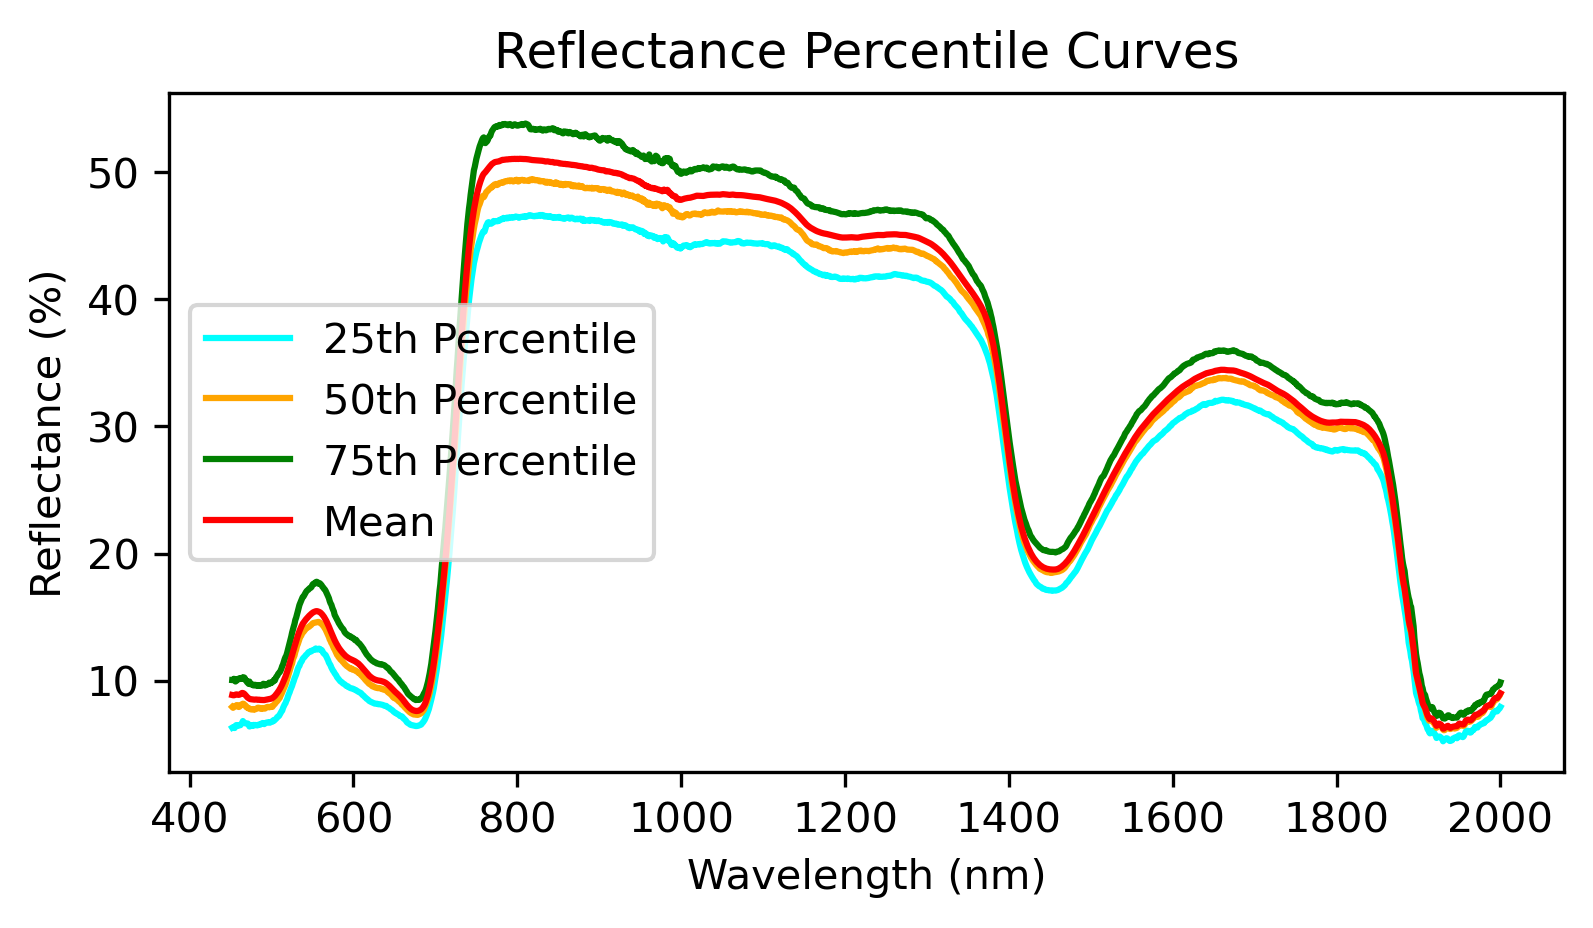

In [63]:
### YOUR CODE HERE ###


# Extracting the required percentiles from the descriptive_stat dataframe
Xreflectance_mean = Xdescriptive_stat.iloc[1, 1:]
Xreflentance_25th = Xdescriptive_stat.iloc[descriptive_stat.index.get_loc('25%'), 1:]
Xreflectance_50th = Xdescriptive_stat.iloc[descriptive_stat.index.get_loc('50%'), 1:]
Xreflectance_75th = Xdescriptive_stat.iloc[descriptive_stat.index.get_loc('75%'), 1:]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)

# Plotting each line
ax.plot(Xreflectance_25th.index.astype('int'), Xreflectance_25th.values, label='25th Percentile', color='cyan')
ax.plot(Xreflectance_50th.index.astype('int'), Xreflectance_50th.values, label='50th Percentile', color='orange')
ax.plot(Xreflectance_75th.index.astype('int'), Xreflectance_75th.values, label='75th Percentile', color='green')
ax.plot(Xreflectance_mean.index.astype('int'), Xreflectance_mean.values, label='Mean', color='red')

# Setting labels, title, and legend
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance (%)')
ax.legend()
ax.set_title('Reflectance Percentile Curves')

plt.show()


######################

# Data Splitting

In Lab 3, we randomly shuffled the dataset and then divided into two sets, i.e., train set (X_train, y_train) and test set (X_test, y_test). We used the train set to do the modeling (training different models), and the test set was used to performance of the trained models. This time (and from hereon towards the whole course) we can simply do the splitting using the sklearn function <code>train_test_split</code>.

In [64]:
print(X.shape)
print(lcc.shape)


(393, 1550)
(393,)


In [65]:
# Import the module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, lcc, test_size=0.3, random_state=42)
# The random state can be any value. This is the constant that ensures the randomness everytime
# We put X.values here as the X input so that it no longer remains a pd dataframe, but a 2D np array

**Q 07.** What is the number of features here? How much sample do you have for training and testing?

\### YOUR ANSWER HERE ###

There are 1550 features. 
There are total of 393 samples. 
30% of which are test samples = 118 test samples.
The remaining (70%) are train samples = 275 samples. 

# Feature Scaling

Feature scaling means transforming the features in a way so that the values of each feature looses the influence of their units. For example, if we had an input dataset where there were two independent variables named area (in sq. m) and price (in USD), then we have to scale them in a way so that the model does not get weighted too much by just one variable. For this reflectance dataset, the values from all the features are actually reflectance which share similar unit (they are basically unitless since they are just percentages). So we dont have to necessarily scale the data but there could be outliers so we should consider scaling. We will do a min max scaling where every feature will have a data range from 0 to 1. We could also do Standard Scaling where the values will be converted to the z score.

In [66]:
# Import the module
from sklearn.preprocessing import MinMaxScaler

# Define the scaling object
scaler = MinMaxScaler()
scaler.fit(X_train)
# Fit the scaler and transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction

See that our independent feature space is quite large. There is a rule of thumb that if the sample size is less than the number of features, the model may underperform or overperform. Therefore, often we may need to reduce the dimensions (or feature space) using different techniques. Here we will use Principal Component Analysis (PCA) to reduce the dimensions. We could use other dimensionality reduction techniques too (e.g., singular value decomposition).

In [67]:
# Import the module
from sklearn.decomposition import PCA

# Define the pca object
pca = PCA(n_components=2)

# Fit the pca
pca.fit(X_train_scaled)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.72242771 0.1463198 ]


Since we used 2 as the components for the PCA analysis, the explained variance ratio says that the 1st principal component (or PC1) can explain 69% variance in the data, whereas the PC2 can explain 12% variance. We should use a number of component where we have one PC that can explain very few percentage of the training data. Let's try with different n_components and see the explained ratio:

In [68]:
# 3 components
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)

# 4 components
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)

# 5 components
pca = PCA(n_components=5)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)

# 6 components
pca = PCA(n_components=6)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)

[0.72242771 0.1463198  0.08232348]
[0.72242771 0.1463198  0.08232348 0.01571214]
[0.72242771 0.1463198  0.08232348 0.01571214 0.00734036]
[0.72242771 0.1463198  0.08232348 0.01571214 0.00734036 0.00544717]


Now see that when the component is 5 and 6, the least value PC explained variance ratio is not that different. The last PC from n_components 5 has 0.00607892 and if we add one more PC, then that PC will explain only 0.00523358 variance. This is not much. So we will use n_components as 5 for this dataset.

In [69]:
# We have overwritten the pca object several times. Let's train it again
pca = PCA(n_components=5)

# Fit and transform the data according to the pca analysis
# Remeber to transform the test data too
pca.fit(X_train)
X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)

# Print their shape now
print(X_train_pc.shape)
print(X_test_pc.shape)

(275, 5)
(118, 5)


# Model Training

At this stage we can start training our model. In Lab 3, we dealt with a classification problem, so the models were machine learning classifiers. In this lab we are predicting Leaf Chlorophyll Concentration (LCC) of leaves which is a continuous variable, hence a regression problem. For regression problem, we need to import/use machine learning regressors. If you go to scikit-learn website, you will find that there are usually two versions of machine learning algorithms, i.e., classifier and regressor. For example, random forest has both RandomForestClassifier and RandomForestRegressor estimators. However, some models only offer one type problem solving so you cannot get two versions of estimators from them. For example, you cannot find the classifier of linear regression or you can never use logistic regression for regression problems.

At this moment, we will utilize a Support Vector Machin Regressor. However, instead of manually trying all the hyperparameters, we will perform an automated way to know the hyperparameters using GridSearch. We will also use a cross validation while doing so. The cross validation will ensure the robustness of our trained model.

In [73]:
# Import modules
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [74]:
# Define the base estimator first
svr = SVR() # Look that we have not used any hyperparameter here

# Define the parameter search space with different values for hyperparameters
# It has to be a dictionary, where the keys are the hyperparametr names (in string)
# and the values are the options. The values can be either list of np array.
parameters = {'kernel': ['linear', 'rbf'],
              'C': [0.125, 0.25, 0.5, 1.0, 2.0, 4.0],
              'gamma': ['scale', 'auto']}

We have defined 2 options for the 'kernel' hyperparameter, 6 options for the 'C', and 2 options for the 'gamma'. Now the GridSearch algorithm will train 2\*6\*2=24 SVR models with combination of these hyperparameters. We will also use a cross validation number during the model training. If we use 5 as cross validation, then in each run, the algorithm will randomly divide the training set to 5 different sets, then pick 4 sets for training and then calculate the score for the rest 1 set. This will be running for every combination. This process will ensure the model can tackle any unseen data. **Note that** the algorithm is not deciding which hyperparameters are good based on the testing set. Testing set is still unseen. Now let's perform the search.

In [78]:
# Define the grid search object
grid = GridSearchCV(estimator=svr,
                    param_grid=parameters,
                    cv=5,
                    n_jobs=-1) # -1 will ensure that all the cores of the processor is being used in parallel mode
# Fit the grid using train set
grid.fit(X_train_pc, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.125, 0.25, 0.5, 1.0, 2.0, 4.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [76]:
# Get the cross validation results
grid.cv_results_

{'mean_fit_time': array([0.00957885, 0.01589866, 0.01270289, 0.01568913, 0.        ,
        0.        , 0.        , 0.01637073, 0.00379634, 0.        ,
        0.        , 0.        , 0.00300097, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0062892 , 0.0031446 ,
        0.00943379, 0.0031446 , 0.00313177, 0.        ]),
 'std_fit_time': array([0.0078211 , 0.00999282, 0.00635285, 0.00013781, 0.        ,
        0.        , 0.        , 0.00049196, 0.00660375, 0.        ,
        0.        , 0.        , 0.00600195, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00770266, 0.0062892 ,
        0.00770266, 0.0062892 , 0.00626354, 0.        ]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00638762, 0.00060253, 0.        , 0.        ,
        0.        , 0.        , 0.00300097, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0031446 , 0.0031446 ,
        0.      

In [79]:
# Since it is a dictionary and hard to read, lets convert that to a pd datafram
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.003079      0.004474         0.000199        0.000399   0.125   
1        0.003786      0.003298         0.001453        0.001278   0.125   
2        0.003143      0.004302         0.000000        0.000000   0.125   
3        0.001769      0.001783         0.002016        0.003261   0.125   
4        0.004307      0.003483         0.000702        0.001403    0.25   
5        0.000702      0.001403         0.000000        0.000000    0.25   
6        0.006575      0.003695         0.000797        0.000743    0.25   
7        0.001220      0.001639         0.001504        0.003008    0.25   
8        0.006639      0.002874         0.000782        0.000718     0.5   
9        0.000192      0.000385         0.000000        0.000000     0.5   
10       0.009340      0.004784         0.000736        0.001047     0.5   
11       0.005618      0.004147         0.000546        0.000618     0.5   
12       0.002893      0.001511         0.000000        0.000000     1.0   
13       0.000000      0.000000         0.006884        0.005633     1.0   
14       0.011609      0.003999         0.000399        0.000488     1.0   
15       0.001554      0.001001         0.000000        0.000000     1.0   
16       0.002736      0.005471         0.002974        0.005372     2.0   
17       0.005510      0.006783         0.000400        0.000799     2.0   
18       0.006912      0.005475         0.000200        0.000400     2.0   
19       0.004416      0.005508         0.002535        0.005071     2.0   
20       0.008045      0.006772         0.002211        0.003771     4.0   
21       0.000964      0.001928         0.000964        0.001928     4.0   
22       0.004382      0.004495         0.000000        0.000000     4.0   
23       0.008186      0.004123         0.003492        0.003625     4.0   

   param_gamma param_kernel  \
0        scale       linear   
1        scale          rbf   
2         auto       linear   
3         auto          rbf   
4        scale       linear   
5        scale          rbf   
6         auto       linear   
7         auto          rbf   
8        scale       linear   
9        scale          rbf   
10        auto       linear   
11        auto          rbf   
12       scale       linear   
13       scale          rbf   
14        auto       linear   
15        auto          rbf   
16       scale       linear   
17       scale          rbf   
18        auto       linear   
19        auto          rbf   
20       scale       linear   
21       scale          rbf   
22        auto       linear   
23        auto          rbf   

                                               params  split0_test_score  \
0   {'C': 0.125, 'gamma': 'scale', 'kernel': 'line...           0.276274   
1     {'C': 0.125, 'gamma': 'scale', 'kernel': 'rbf'}          -0.006527   
2   {'C': 0.125, 'gamma': 'auto', 'kernel': 'linear'}           0.276274   
3      {'C': 0.125, 'gamma': 'auto', 'kernel': 'rbf'}           0.042448   
4   {'C': 0.25, 'gamma': 'scale', 'kernel': 'linear'}           0.306646   
5      {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}          -0.006522   
6    {'C': 0.25, 'gamma': 'auto', 'kernel': 'linear'}           0.306646   
7       {'C': 0.25, 'gamma': 'auto', 'kernel': 'rbf'}           0.086245   
8    {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}           0.324439   
9       {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}          -0.006512   
10    {'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}           0.324439   
11       {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}           0.144627   
12   {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}           0.334705   
13      {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}          -0.006492   
14    {'C': 1.0, 'gamma': 'auto', 'kernel': 'linear'}           0.334705   
15       {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}           0.192268   
16   {'C': 2.0, 'gamma': 'scale', '

See that there were 24 combinations of hyperparameters trained and the test scores for each combination was given. Also based on the scores, a ranking score is also given. We can now that which parameter combination gave us the best result. In our case, the best score was found when the values of 'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf' are used. We can extract the best model from the grid object.

In [80]:
# Get the best model
best_model = grid.best_estimator_

# Use the best model to predict values from test set
y_pred = best_model.predict(X_test_pc)

In [81]:
# Calculate the R-squared and mean squared error from the predicted lcc and measured lcc values
# REMEMBER that this is a regression problem, we cannot use accuracy score to judge the model
# performance

# Import modules
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Get the scores
mse = mean_squared_error(y_test, y_pred)
# Its better to get root means squared error
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) 

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  37.10071431486948
RMSE:  6.091035569988857
R2:  0.39634813228042465


Lets create a figure where in the x-axis we can put the measured lcc values and in the y-axis we can put the predicted values. This is called scatter plots and these are very popular to showcase the performance of the regression models.

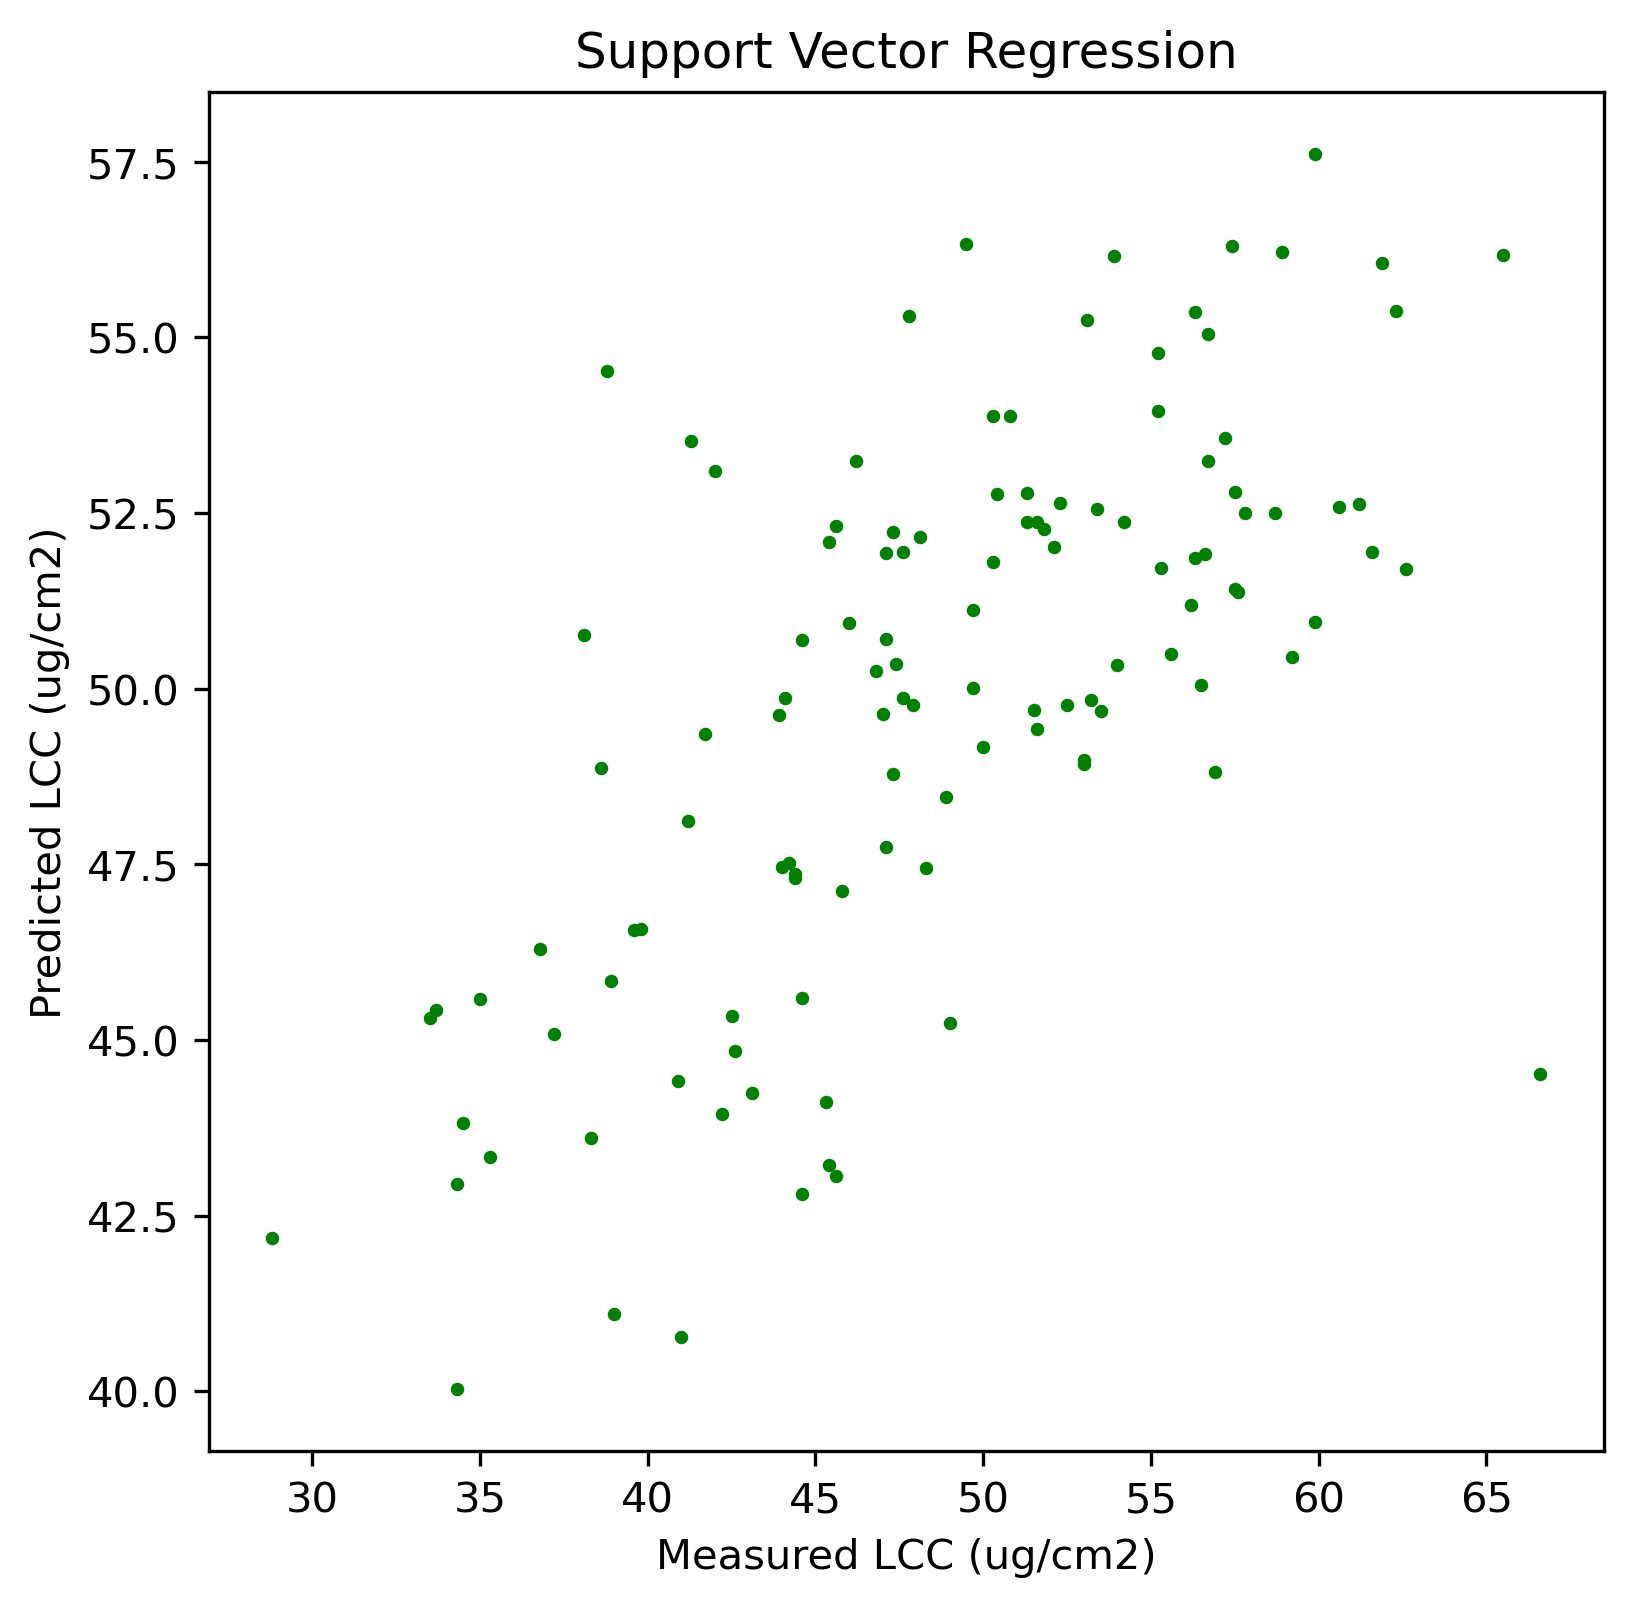

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

ax.scatter(y_test, y_pred, color='green', s=5)
# Learn more about the options like color and s and many more

ax.set_xlabel('Measured LCC (ug/cm2)')
ax.set_ylabel('Predicted LCC (ug/cm2)')
ax.set_title('Support Vector Regression')

plt.show()

It looks like that the predicted lcc values are all over the place. Even the R2 score is not that high (close to 1.0 is always good). However, it does not mean that this particular model is bad. But it suggests we may need to expand our parameter space (for example more options of C). Also, it is standard that we test other common algorithms as well. That is your task.

**Q 08.** Train the following regression algorithms with hyperparameter tuning. Use the following table for the suggestion of hyperparamters and use 5 as cross validation:

| Model Name                   | Hyperparameter | Suggested values                              |
|------------------------------|----------------|-----------------------------------------------|
| Partial Least Squares (PLS)  | n_components   | Try 1, 2, 3,...., maximum number of features  |
| Decision Tree (DT)           | criterion      | mse, mae                                      |
|                              | max_features   | auto, sqrt, log2, None                        |
| Random Forests (RF)          | n_estimators   | 100, 200, ....., 500                          |
|                              | criterion      | mse, mae                                      |
|                              | max_features   | auto, sqrt, log2                              |
| Support Vector Machine (SVM) | kernel         | rbf, linear                                   |
|                              | C              | 2^-5 to 2^10 where the power increases with 1 |
|                              | gamma          | scale, auto                                   |

**TO DO:**
1. Use the X_train_pc, y_train, X_test_pc, and y_test created above for the training and testing.
2. Develop four grid search objects seperately for four models. Use the hyperparameter space suggested above.
3. If it takes too much time to train, try to use the lab computers for training.
4. You need to calculate R2 and RMSE of four models after doing the hyperparameter tuning.

**DELIVERABLES:**
1. A figure (saved as jpg or png) containing four subplots of scatterplots. Each scatterplot will demonstrate the predicted lcc values from four models and the measured lcc value in the x axis. Figure size should be 15, 4 and dpi should be 300. Follow the provided figure as a guideline.
2. From each grid search algorithm (for each model), generate the pandas dataframe of the cv_results. Save the cv_results for each model as csv file and name it like this: model_name_cv.csv (for example decision tree cv results would be decision_trees_cv.csv). To save the csv from pandas, you can use df.to_csv() method. Learn from their website if you need help.
3. A table in a microsoft word document where you will put four columsn. Column will include model name, R2, RMSE, and the best hyperparmaeter combination. So the table size would be 4 by 4.
4. In summary:
    a. A figure jpg/png
    b. Four csv of cv results
    c. A docx containing the final result
    
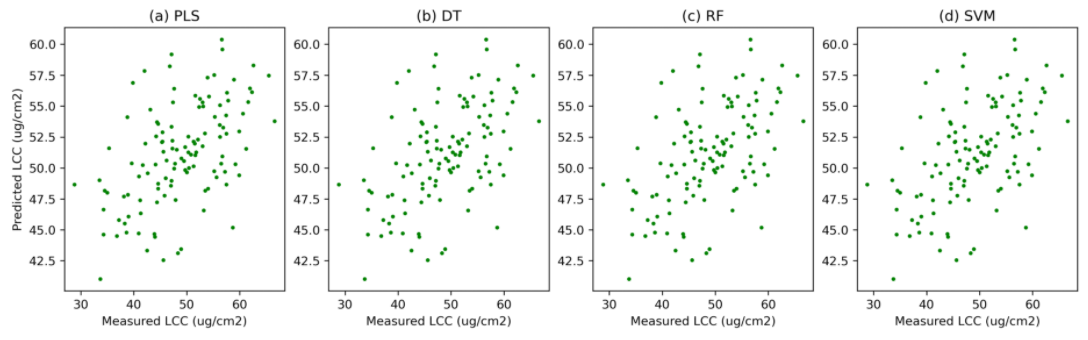

# PLS 

In [118]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

# Define the base estimator
pls = PLSRegression()

# Define the parameter search space
parameters_pls = {'n_components': list(range(1, X_train_pc.shape[1] + 1))}

# Define the grid search object
grid_pls = GridSearchCV(estimator=pls, param_grid=parameters_pls, cv=5, n_jobs=-1)
grid_pls.fit(X_train_pc, y_train)


GridSearchCV(cv=5, estimator=PLSRegression(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5]})

In [119]:
# Get the best model
best_model_pls = grid_pls.best_estimator_

# Use the best model to predict values from test set
y_pred_pls = best_model_pls.predict(X_test_pc)


In [124]:
# Get the scores
mse_pls = mean_squared_error(y_test, y_pred_pls)
# Its better to get root means squared error
rmse_pls = np.sqrt(mse_pls)
r2_pls = r2_score(y_test, y_pred_pls) 

print('MSE: ', mse_pls)
print('RMSE: ', rmse_pls)
print('R2: ', r2_pls)

MSE:  42.70566150454794
RMSE:  6.534956886204219
R2:  0.3051521296696892


In [143]:
grid_pls.best_params_

{'n_components': 3}

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeRegressor

# Define the base estimator
dt = DecisionTreeRegressor()

# Define the parameter search space
parameters_dt = {'criterion': ['mse', 'mae'],
                 'max_features': ['auto', 'sqrt', 'log2', None]}

# Define the grid search object
grid_dt = GridSearchCV(estimator=dt, param_grid=parameters_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train_pc, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [125]:
# Get the best model
best_model_dt = grid_dt.best_estimator_

# Use the best model to predict values from test set
y_pred_dt = best_model_dt.predict(X_test_pc)

In [126]:
# Get the scores
mse_dt = mean_squared_error(y_test, y_pred_dt)
# Its better to get root means squared error
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt) 

print('MSE: ', mse_dt)
print('RMSE: ', rmse_dt)
print('R2: ', r2_dt)

MSE:  57.14025423728815
RMSE:  7.559117292203379
R2:  0.07029226177227266


In [141]:
grid_dt.best_params_

{'criterion': 'mse', 'max_features': 'sqrt'}

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Define the base estimator
rf = RandomForestRegressor()

# Define the parameter search space
parameters_rf = {'n_estimators': list(range(100, 501, 100)),
                 'criterion': ['mse', 'mae'],
                 'max_features': ['auto', 'sqrt', 'log2']}

# Define the grid search object
grid_rf = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train_pc, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [129]:
# Get the best model
best_model_rf = grid_rf.best_estimator_

# Use the best model to predict values from test set
y_pred_rf = best_model_rf.predict(X_test_pc)

In [130]:
# Get the scores
mse_rf = mean_squared_error(y_test, y_pred_rf)
# Its better to get root means squared error
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf) 

print('MSE: ', mse_rf)
print('RMSE: ', rmse_rf)
print('R2: ', r2_rf)

MSE:  36.780534271186475
RMSE:  6.064695727832228
R2:  0.40155766220309563


In [146]:
grid_rf.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 100}

# SVM

In [86]:
from sklearn.svm import SVR

# Define the base estimator
svm = SVR()

# Define the parameter search space
C_values = [2**i for i in range(-5, 11)]
parameters_svm = {'kernel': ['rbf', 'linear'],
                  'C': C_values,
                  'gamma': ['scale', 'auto']}

# Define the grid search object
grid_svm = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train_pc, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128, 256, 512, 1024],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']})

In [132]:
# Get the best model
best_model_svm = grid_svm.best_estimator_

# Use the best model to predict values from test set
y_pred_svm = best_model_svm.predict(X_test_pc)

In [133]:
# Get the scores
mse_svm = mean_squared_error(y_test, y_pred_svm)
# Its better to get root means squared error
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm) 

print('MSE: ', mse_svm)
print('RMSE: ', rmse_svm)
print('R2: ', r2_svm)

MSE:  34.42572120398503
RMSE:  5.867343624161195
R2:  0.4398719462376999


In [148]:
grid_svm.best_params_

{'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}

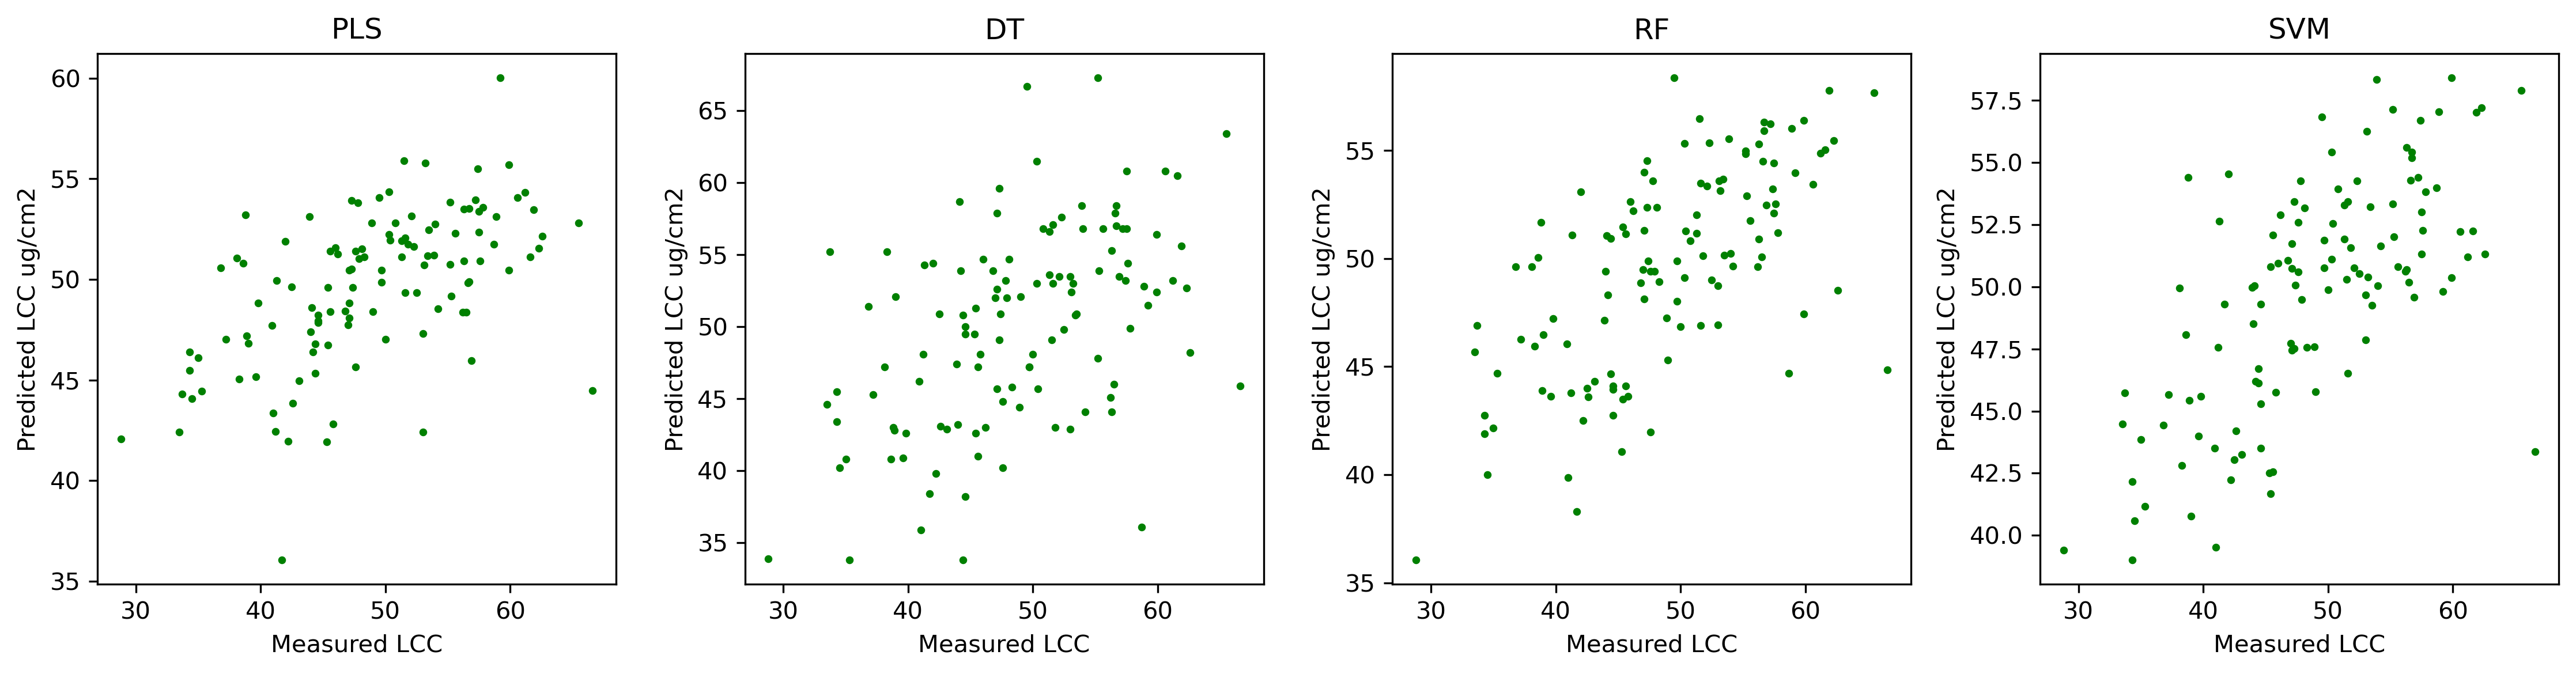

In [149]:
import matplotlib.pyplot as plt

# Predictions
y_pred_pls = grid_pls.best_estimator_.predict(X_test_pc)
y_pred_dt = grid_dt.best_estimator_.predict(X_test_pc)
y_pred_rf = grid_rf.best_estimator_.predict(X_test_pc)
y_pred_svm = grid_svm.best_estimator_.predict(X_test_pc)

# Scatterplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), dpi=300)

axs[0].scatter(y_test, y_pred_pls, color='green', s=5)
axs[0].set_title('PLS')
axs[0].set_xlabel('Measured LCC')
axs[0].set_ylabel('Predicted LCC ug/cm2')

axs[1].scatter(y_test, y_pred_dt, color='green', s=5)
axs[1].set_title('DT')
axs[1].set_xlabel('Measured LCC')
axs[1].set_ylabel('Predicted LCC ug/cm2')

axs[2].scatter(y_test, y_pred_rf, color='green', s=5)
axs[2].set_title('RF')
axs[2].set_xlabel('Measured LCC')
axs[2].set_ylabel('Predicted LCC ug/cm2')

axs[3].scatter(y_test, y_pred_svm, color='green', s=5)
axs[3].set_title('SVM')
axs[3].set_xlabel('Measured LCC')
axs[3].set_ylabel('Predicted LCC ug/cm2')

plt.tight_layout()
plt.savefig('scatterplots_part1.png')


In [138]:
import pandas as pd

# Convert cv_results_ to DataFrames and save as CSV
pd.DataFrame(grid_pls.cv_results_).to_csv('pls_cv.csv', index=False)
pd.DataFrame(grid_dt.cv_results_).to_csv('decision_tree_cv.csv', index=False)
pd.DataFrame(grid_rf.cv_results_).to_csv('random_forest_cv.csv', index=False)
pd.DataFrame(grid_svm.cv_results_).to_csv('svm_cv.csv', index=False)
